In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso

In [45]:
df=pd.read_csv('rq1_cleaned.csv')
df.shape

(20593, 106)

In [15]:
df.columns
df=df.drop(['EQ5D_Round3', 'EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df_linear= df[df['EQ5D_Round2'].notnull()]  # for example


In [16]:
full = df_linear.copy()

In [17]:
X=full.drop(['EQ5D_Round2','SID'], axis=1)
y=full['EQ5D_Round2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
## Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

features = coef_df['Feature'].values


Test MSE: 0.041
Test R²: 0.448
                    Feature  Coefficient
0               EQ5D_Round1     0.152615
3                occupation     0.022924
38        diag_Chronic pain    -0.020858
41        diag_Fibromyalgia    -0.018575
89           Linalool (PPM)     0.018503
96           Humulene (PPM)    -0.016492
80       alpha-Pinene (PPM)     0.016430
99     Total terpene (%w/w)     0.015769
42  diag_Multiple sclerosis    -0.015225
1                       Age    -0.015078


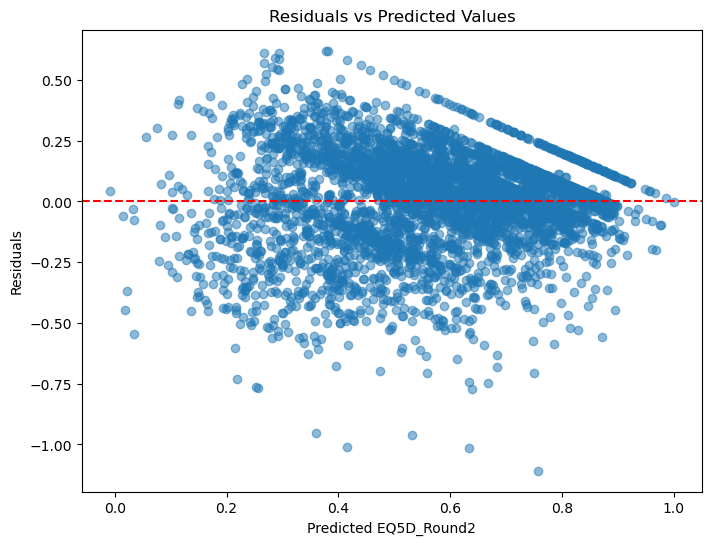

In [19]:
residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted EQ5D_Round2")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [25]:
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))


Test MSE: 0.041
Test R²: 0.448
                    Feature  Coefficient
0               EQ5D_Round1     0.152601
3                occupation     0.022924
38        diag_Chronic pain    -0.020854
41        diag_Fibromyalgia    -0.018572
89           Linalool (PPM)     0.018478
80       alpha-Pinene (PPM)     0.016399
96           Humulene (PPM)    -0.016379
99     Total terpene (%w/w)     0.015706
42  diag_Multiple sclerosis    -0.015223
1                       Age    -0.015077


In [27]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

print(f"Test MSE: {mse}")

Test MSE: 0.041
Test R²: 0.449
                                Feature  Coefficient
0                           EQ5D_Round1     0.153669
3                            occupation     0.022068
38                    diag_Chronic pain    -0.016144
41                    diag_Fibromyalgia    -0.015683
1                                   Age    -0.015368
42              diag_Multiple sclerosis    -0.012517
27                                  VTE    -0.007616
71                            form_Flos     0.007606
43                diag_Neuropathic pain    -0.006887
58  diag_Complex regional pain syndrome    -0.006660
Test MSE: 0.04102007461657698


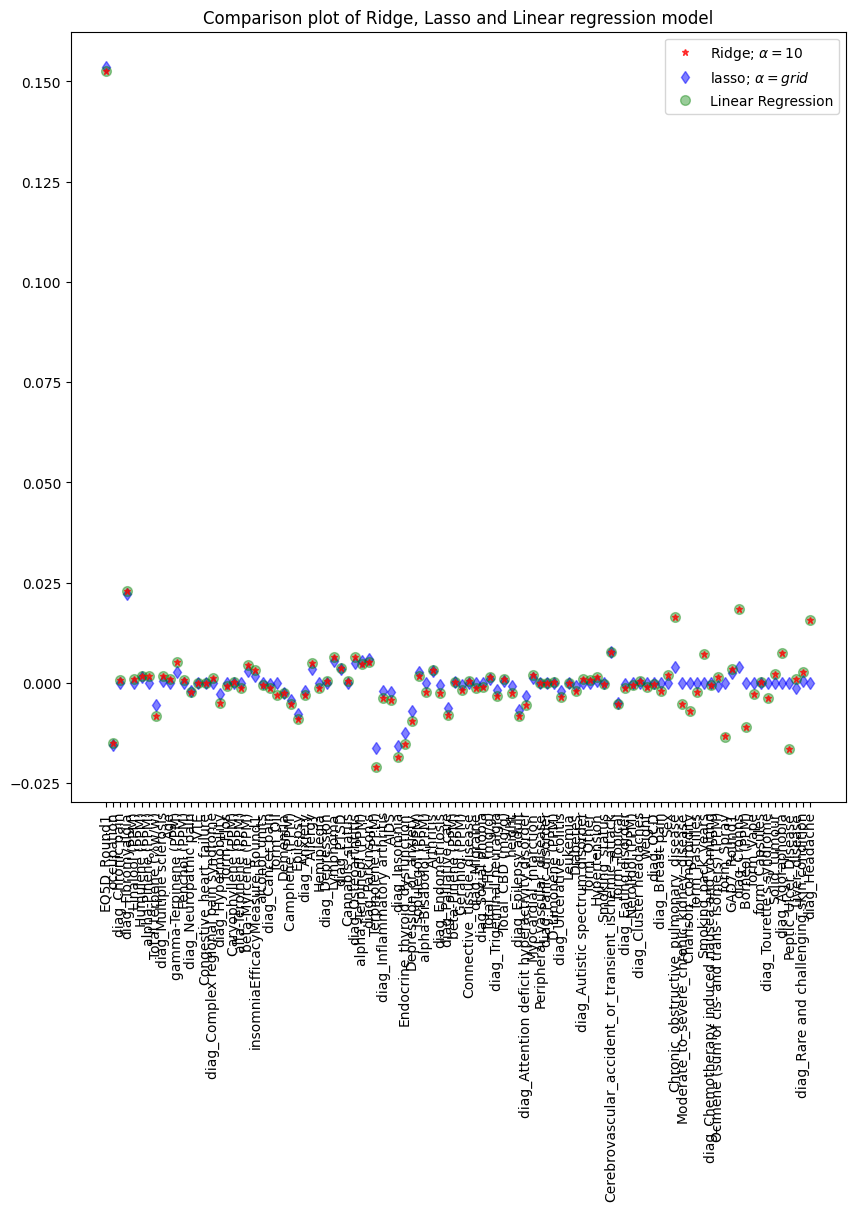

In [18]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()


In [46]:
df.columns
df=df.drop(['EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df_linear= df[df['EQ5D_Round3'].notnull()]  
df_linear= df_linear[df_linear['EQ5D_Round2'].notnull()]  

In [47]:
full=df_linear.copy()

In [48]:
X=full.drop(['EQ5D_Round3','SID'], axis=1)
y=full['EQ5D_Round3']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
## Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

features = coef_df['Feature'].values


Test MSE: 0.031
Test R²: 0.586
                  Feature  Coefficient
1             EQ5D_Round2     0.147467
0             EQ5D_Round1     0.061177
97         Humulene (PPM)     0.026689
96    Caryophyllene (PPM)    -0.017835
4              occupation     0.015543
100  Total terpene (%w/w)    -0.015205
72              form_Flos     0.009293
82         Camphene (PPM)     0.008681
81     alpha-Pinene (PPM)    -0.007937
79       Total_THC (mg/g)     0.007522


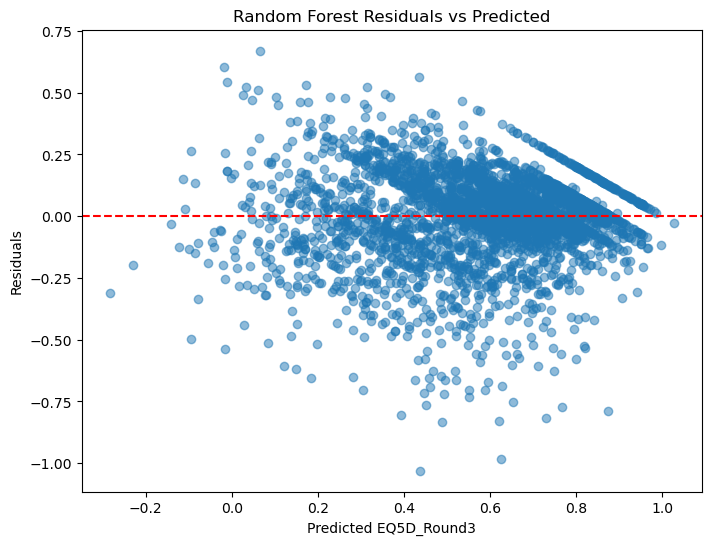

In [51]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted EQ5D_Round3")
plt.ylabel("Residuals")
plt.title("Random Forest Residuals vs Predicted")
plt.show()


In [25]:
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))


Test MSE: 0.031
Test R²: 0.586
                  Feature  Coefficient
1             EQ5D_Round2     0.147451
0             EQ5D_Round1     0.061179
97         Humulene (PPM)     0.026416
96    Caryophyllene (PPM)    -0.017667
4              occupation     0.015544
100  Total terpene (%w/w)    -0.015026
72              form_Flos     0.009274
82         Camphene (PPM)     0.008633
81     alpha-Pinene (PPM)    -0.007970
79       Total_THC (mg/g)     0.007497


In [26]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

print(f"Test MSE: {mse}")

Test MSE: 0.031
Test R²: 0.587
                                          Feature  Coefficient
1                                     EQ5D_Round2     0.147922
0                                     EQ5D_Round1     0.061812
4                                      occupation     0.014788
39                              diag_Chronic pain    -0.006251
42                              diag_Fibromyalgia    -0.005866
2                                             Age    -0.005764
72                                      form_Flos     0.004584
37                                diag_Depression     0.004528
45  diag_Attention deficit hyperactivity disorder     0.004356
87                               D-Limonene (PPM)    -0.003809
Test MSE: 0.031259519252075894


RF

In [31]:
df.columns
df=df.drop(['EQ5D_Round3', 'EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df_linear= df[df['EQ5D_Round2'].notnull()]  # for example

full = df_linear.copy()

X=full.drop(['EQ5D_Round2','SID'], axis=1)
y=full['EQ5D_Round2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=2000, max_depth=5, random_state=100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, n_estimators=2000, random_state=100)

In [43]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")


Test MSE: 0.041
Test R²: 0.451


In [27]:
print(type(rf_model))      # Should be RandomForestRegressor
print(y_pred[:5])          # Should change between models


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
[0.6707201  0.5187241  0.73520372 0.56446077 0.31981415]


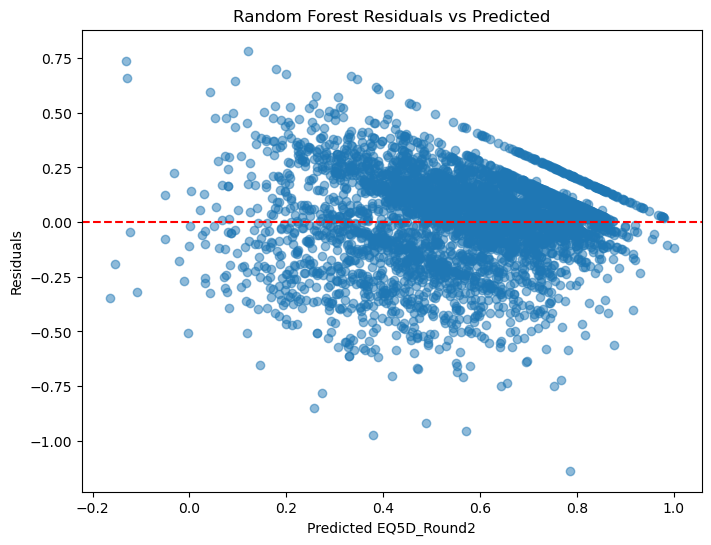

In [7]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted EQ5D_Round2")
plt.ylabel("Residuals")
plt.title("Random Forest Residuals vs Predicted")
plt.show()
